In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/mar_1-5.csv')


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(85217, 7)


,date,id,text,hashtags,retweet_count,location,cleaned
0,2020-03-01,1234034491179618304,Memo to PM: get a grip before the wheels come ...,[],1559.0,"{'country_code': 'in', 'state': 'Maharashtra'...",memo pm get grip wheels come sack inadequate h...
1,2020-03-01,1234034520275312640,You can take the man out of Pakistan but can’t...,[],35.0,{'country_code': 'in'},take man pakistan take pakistan man pakistan mean
2,2020-03-01,1234034782075543552,#RT @techreview: Here's how to be an expert co...,['RT'],0.0,"{'country_code': 'in', 'state': 'Gujarat', 'c...",rt expert coronavirus prepper
3,2020-03-01,1234035480682954753,@MOTRPolitics1 @stephenfhayes @TheRickWilson C...,[],0.0,"{'country_code': 'in', 'state': 'Rajasthan', ...",coronavirus politicized hyped fear politicians...
4,2020-03-01,1234037207461179393,Due to Coronavirus Threat The Holi event sched...,"['Holi', 'Erbil', 'Indians']",2.0,{'country_code': 'in'},due coronavirus threat holi event scheduled th...


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned
85212,2020-03-05,1235536734273687559,SM Coordinator of @INCIndia https://t.co/xS1X4...,[],2.0,{'country_code': 'in'},sm coordinator
85213,2020-03-05,1235439721796403202,Is #coronavirusindia more dangerous than this ...,"['coronavirusindia', 'coronavirus', 'Corona']",0.0,{'country_code': 'in'},coronavirusindia dangerous ? ? coronavirus corona
85214,2020-03-05,1235459545171767297,"Covid-19 deaths in China over 3K, Coronavirus ...",[],0.0,"{'country_code': 'in', 'state': 'Delhi'}",covid deaths china coronavirus cases south kor...
85215,2020-03-05,1235642049644204032,Don't spread rumours. #Coronvirus #COVID19indi...,"['Coronvirus', 'COVID19india', 'rumours', 'Fak...",0.0,"{'country_code': 'in', 'state': 'West Bengal'...",spread rumours coronvirus covid india harmful ...
85216,2020-03-05,1235527441810104320,"COVID-19 not transmitted through meat, egg or ...",[],0.0,"{'country_code': 'in', 'state': 'Delhi'}",covid transmitted meat egg fish giriraj singh


In [ ]:
print(df.shape)
df.isnull().sum()

(85217, 7)


date             0
id               0
text             0
hashtags         1
retweet_count    1
location         1
cleaned          0
dtype: int64

In [ ]:
!pip install -U pywsd

Requirement already up-to-date: pywsd in /usr/local/lib/python3.6/dist-packages (1.2.4)


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0    memo pm get grip wheels come sack inadequate h...
1    take man pakistan take pakistan man pakistan mean
2                        rt expert coronavirus prepper
3    coronavirus politicized hyped fear politicians...
4    due coronavirus threat holi event scheduled th...
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

85217


'memo pm get grip wheels come sack inadequate home secretary rather later come hiding offer leadership floods coronavirus collapse markets hero churchill would done'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

In [ ]:
t_clean[0]

['memo',
 'pm',
 'get',
 'grip',
 'wheel',
 'come',
 'sack',
 'inadequate',
 'home',
 'secretary',
 'rather',
 'later',
 'come',
 'hiding',
 'offer',
 'leadership',
 'flood',
 'coronavirus',
 'collapse',
 'market',
 'hero',
 'churchill',
 'would',
 'do']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

memo


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

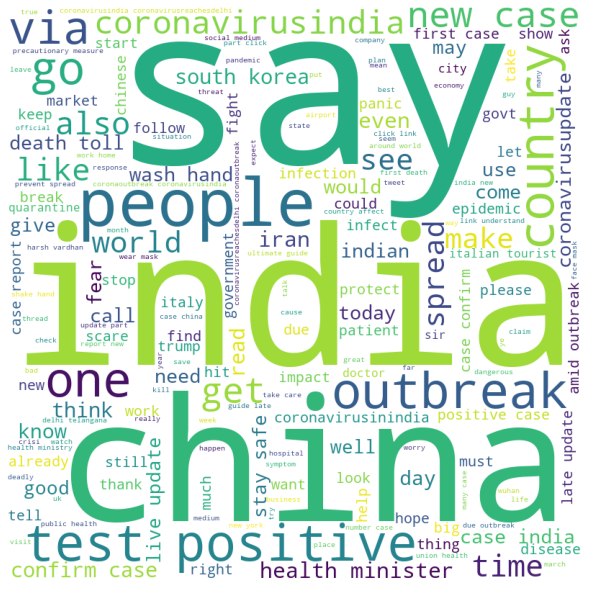

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['memo pm get grip wheel come sack inadequate home secretary rather later come hiding offer leadership flood coronavirus collapse market hero churchill would do',
 'take man pakistan take pakistan man pakistan mean',
 'rt expert coronavirus prepper',
 'coronavirus politicize hyped fear politician msm feed public eat shit cont propagate nonsense instruct use common sense hygiene stay away lrg crowds eat healthy stay rest case',
 'due coronavirus threat holi event schedule th march cancel sorry inconvenience cause holi erbil indian']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['across country',
 'across globe',
 'across world',
 'across world advise',
 'action plan',
 'adopt indian',
 'adopt namaste',
 'advise reduce',
 'advise reduce mass',
 'advisory school',
 'affect country',
 'affect know',
 'affect know many',
 'affect many',
 'affect many case',
 'affect outbreak',
 'affect way',
 'affect way prevent',
 'air india',
 'air pollution',
 'alcohol base',
 'also get',
 'also make',
 'amid concern',
 'amid fear',
 'amid outbreak',
 'amid scare',
 'amit shah',
 'announces global',
 'announces global death',
 'another telangana',
 'answer question',
 'appeal calm',
 'around make',
 'around make tough',
 'around world',
 'arrive india',
 'arundhati roy',
 'arundhati roy delhi',
 'arvind kejriwal',
 'ask staff',
 'assam bjp',
 'assam bjp mla',
 'avoid large',
 'avoid public',
 'avoid public gathering',
 'avoid spread',
 'avoid touch',
 'basic protective',
 'basic protective measure',
 'basis help',
 'basis help plan',
 'bbc news',
 'benjamin netanyahu',
 'best

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:health minister,case india,harsh vardhan,union health,union health minister,avoid spread,shake hand,india news,know many,prime minister\nTopic 1:due outbreak,coronavirusindia coronavirusreachesdelhi,first death,two new,two new case,contain spread,health official,spread awareness,new post,washington state\nTopic 2:stay safe,amid outbreak,country affect,case china,many case,many case china,affect know,country affect know,affect know many,know many case\nTopic 3:coronavirusinindia coronaalert,primary school,coronaalert coronavirusinindia,holi milan,late update,paytm employee,coronaalert coronavirusindia,participate holi,cruise ship,wednesdaythoughts wednesdaymotivation\nTopic 4:live update,south korea,case confirm,update india,new case confirm,live update india,outbreak two,outbreak two new,case confirm watch,confirm watch\nTopic 5:people die,new york,time die,take precaution,hand sanitizer,stay home,th march,italy iran,namo app,via namo\nTopic 6:coronavirusindia coronaalert,prev

In [ ]:
lda.perplexity(tf)

540.8716137962862

In [ ]:
f=open('lda_mar_1-5.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_mar_1-5.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_mar_1-5.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_mar_1-5-20.pk')
shutil.move("topics_mar_1-5.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_mar_1-5.txt')